# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
using PyPlot

In [2]:
#Pkg.update()
#Pkg.add("DualNumbers")
#using Plots
using DualNumbers

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

** Part 1 **

Using taylor expansion to find $f_{i+1} = f(x+h)$ and $f_{i+2} = f(x+2h)$:

$f(x+h) = f(x) + hf'(x) + \dfrac{h^2}{2}f''(x) + O(h^3)$

$f(x+2h) = f(x) + 2hf'(x) + \dfrac{4h^2}{2}f''(x) + O(h^3)$

Consideing the linear combination $a_1f_i + a_2f_{i+1} + a_3f_{i+2}$:

$a_1f_i + a_2f_{i+1} + a_3f_{i+2} = (a_1 + a_2 + a_3)f(x) + (a_2 + 2a_3)hf'(x) + (\dfrac{a_2}{2} + 2a_3)h^2 f''(x) $

Choosing the values of $a_1,a_2$ and $a_3$ to satisfy:

$ a_1 + a_2 + a_3 = 0 $

$ a_2 + 2a_3 = 1 $

$\dfrac{a_2}{2} + 2a_3 = 0$

Therefore $ a_1 = -\dfrac{3}{2}, a_2 = 2, a_3 = -\dfrac{1}{2} \rightarrow\ hf'(x) = -\dfrac{3}{2}f(x) + 2f(x+h) -\dfrac{1}{2} f(x+2h) + O(h^3)$

$f'(x) = \dfrac{-3f(x)+4f(x+h)-f(x+2h)}{2h} + O(h^2) $


** Part 2 **

$f'(x) = \dfrac{-3sin(e^x)+4sin(e^{x+h})-sin(e^{x+2h})}{2h}$

$f'(x) = \dfrac{-3sin(e)+4sin(e^{1+h})-sin(e^{1+2h})}{2h}$

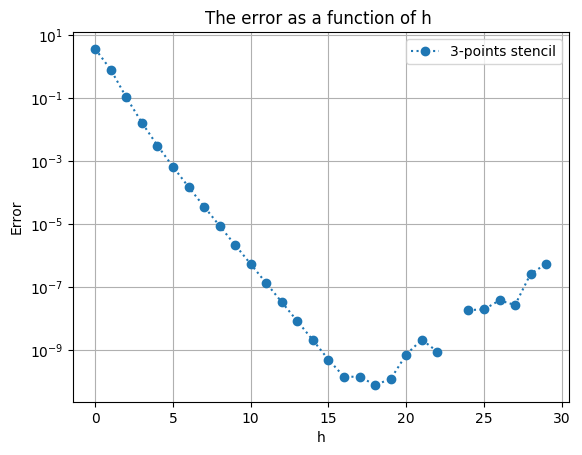

In [3]:
# Part 3

f(x) = sin(exp(x))                                       # The function
f_p(x) = exp(x)*cos(exp(x))                              # The derivative of the function

error = zeros(30)
f_prim = zeros(30)

for i=1:30
    h=2.0^(-i)                                           
    f_prim[i] = (-3*f(1)+4*f(1+h)-f(1+2*h))/(2*h)       #3-points stencil
    error[i] = f_p(1) - f_prim[i]
end

semilogy(error,"o:",label = "3-points stencil")
xlabel("h")
ylabel("Error")
legend()
title("The error as a function of h ")
grid();

<font color=blue>
You could avoid the gaps in this plot (presumably caused by taking the log of negative numbers) by defining your error to be the absolute value of the difference between the exact and approximate values. This is common convention.
</font>

The best relative error is achieved when h=18 and it was 1.4567813622079484e-10.

In [4]:
# Part 4

x = Dual(1,1)
y = f(x)
abs(f_p(1) - dualpart(y))<eps()

true

<font color=blue>
Another good answer.
</font>

<font color=blue>
13/15
</font>

## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.